# Visualizing Data

*Written by Todd Gureckis*<br>
*Updated by Shannon Tubridy (2022)*

Small introductory parts are adapted from Danielle Navarro's excellent [Learning Statistics with R](https://learningstatisticswithr.com) book.  In addition the general structure borrows elements of several classic text about data visualization including Keiran Healy's [Data Visualization](https://socviz.co). Much of the Matplotlib materials comes from the [library documentation](https://matplotlib.org/tutorials/index.html) and some of the seaborn example code is drawn from the outstanding [official seaborn tutorial](https://seaborn.pydata.org/tutorial.html) by [Michael Waskom](https://www.cns.nyu.edu/~mwaskom/index.html).

### Goals for this notebook

- Introduce plotting in Python with matplotlib and seaborn: scatterplots and bar plots
- Introduce stats with scipy library: correlation and t-tests


Over the next few weeks we will do lots of plotting and stats, so today's lesson won't be a comprehensive lesson on either topic. Our goal is to begin seeing how we can integrate the previous lesons with Pandas (filtering, subsetting, accessing columns, grouping) into the next steps in a common analysis pipeline.

In [ ]:
import numpy as np
import pandas as pd

# matplotlib is the core python plotting library
import matplotlib.pyplot as plt

# seaborn is a plotting library built on top of matplotlib
import seaborn as sns

# scipy is a library with tons of scientific computing functions
# the scipy.stats sub library has many common stats calculations in it
import scipy.stats as stats



import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# note this next part
# it is not an import
# instead it is part of Jupyter
# as denoted by the % sumbol in front
# which you have already seen for the 
# %whos command
# Here we are telling jupyter to make the
# figures from matlplotlib to be displayed
# after each cell
%matplotlib inline

## The art of seeing things in data

Data on their own are lifeless and it is up to us to detect and describe patterns in it. One part of that involves quantitative data analysis such as statistical inference or hypothesis testing.  

However, an equally important part of analysis can be to **perceive patterns in data** and **communicate** them to others.  In order for these later two tasks to be successful, we often have to find ways to represent the data that align with our perceptual and cognitive abilities for seeing patterns.

The present chapter is therefore concerned with the visualization of data for the purpose of understanding and communication and beginning to compute inferential statistics. 

### Why create visualizations?

Why do we "visualize" data (implying seeing it with our eyes) instead of listen to data, touch it, or taste it?  

There is actually an entire approach to data "sonification" which does map features of a dataset to sounds which can be both beautiful as well as informative/insightful.  However, it turns out our visual reasoning capacities are very strong and thus are able to detect many types of patterns more easily in a picture compared to a sound.

Many of the features one might use to map data to a sound or music are things we have relatively poor absolute judgment about.  For instance people have trouble detecting the pitch of sounds, separating multiple overlaid sound sources, etc.  This often makes sound less ideal.  The same goes for other senses like touch and taste.  If our brains worked differently and didn't devote so much of our cortex to vision it might be the case that we explore data with sound more often. So instead of changes in sound representing different numbers or groups of numbers we use things like size, shape, and color to indicate variations in our data.

Data Sonification.  Brian Romans, Wired: [https://www.wired.com/2007/04/data-sonification/](https://www.wired.com/2007/04/data-sonification/)

A more concrete reason to visualize data is that it can complement statistical summaries and make certain patterns very salient.

A common teaching example is "Anscombe's quartet" which has four datasets that are matched on some statistics but have very different structures.

Seaborn, which we imported `as sns`, includes some sample datasets.

The seaborn `get_dataset_names()` method returns a list of all the sample datasets:

In [ ]:
sns.get_dataset_names()

To load one of the datasets use the seabor load_dataset() method with input as a string corresponding to one of the available sets.

In [ ]:
### Load the example data for Anscombe's quartet into a pandas dataframe
ans_df = sns.load_dataset("anscombe")

# take a look at the data
ans_df

We have a dataframe of x and y values for each of four datasets.


#### Getting a report of the which values are in a column using .unique()

We can get a report of each value that appears in a particular column using the dataframe `.unique()` method.

df[column_name].unique() will give us an array (like a list) that has one entry for value that appears in the column. 

#### What are the possible values in the dataset column?

df.unique() returns the information in an _array_. This is a numpy array and we can access elements the same way as we would from a list:

In [ ]:
unique_values = ans_df['dataset'].unique()
print(unique_values)
print(unique_values[3])
print(type(unique_values))

numpy arrays have a method attached to them that lets you turn them into an actual list if you prefer:

### Use groupby() to get some descriptive stats about the x and y values in each of the datasets in the dataframe

In [ ]:
# get the mean for each dataset grouping


In [ ]:
# get descriptives stats for each dataset grouping


Based on our descriptive stats, the four datasets (I, II, III, IV) seem to sets of x,y data with very similar qualities.

## Correlation: a brief intro

Computing the correlation between two numeric with matched measurements tells us how much the two sets of numbers go up and or down together.

In the anscombe's data we have paired x and y values within each datset.

The scipy.stats library (imported as stats) has a pearson's correlation function:

```python
stats.pearsonr(x,y)
```

It takes two inputs: the two sets of numbers to compute the correlation on.

It returns a two-element tuple where the first entry is the r value for the correlation and the second is p-value for the null hypothesis that r is essentially zero.

#### Subset our data so we can compute the correlation for each dataset separately

In [ ]:
# reminder of the data:
ans_df.head()

In [ ]:
# use get_group to pull out data for only dataset==1


In [ ]:
# compute pearson's correlation between x and y values in dataset 1


In [ ]:
# repeat for the other groups


#### Numerical summaries of Anscombe's quartet

The descriptive stats and the correlation results indiciate that the four datsets are basically the same. 

Let's take a look at the actual data to see if that's true.

### Our first visualization

Next we will use seaborn to visualize the data in the dataframe. 

In particular we will look at the relationship between the x and y values within each of the four datasets coded in the df['dataset'] column in the form of a scatter plot that shows each x,y pair within each of the four datasets.

Later we will focus more on the details of the code for making the plots, but for now you should focus on the fact that we are using the lmplot() function from seaborn which we imported as sns.

The lmplot() function takes in named arguments for what will be the x and y data in our plots and we point those towards columns named 'x' and 'y' in our dataframe named `ans_df`. 

lmplot() knows to use the x and y columns from that dataframe because we also included the argument `data=df` to let seaborn know where all the data are stored.

In [ ]:
# reminder of df structure
ans_df.head(1)

In [ ]:
# Show the results of a scatterplot and linear regression within each dataset
sns.lmplot(x="x", 
           y="y", 
           col="dataset", 
           hue="dataset", 
           col_wrap=2, 
           data=ans_df,
           ci=None, 
           height=4)

The four datasets clearly do not contain x/y data with the same structure despite the results of our descriptive stats and correlation analysis.

The key insight here is that if we calculated various descriptive statistics on these datasets we might conclude they are nearly identical.  

It is only by visualizing the data in this specific way that we can see patterns we might not have expected to see.  In this way visualization can enable **discovery** of new features of a dataset and lead to new scientific hypotheses.

### The wild world of plotting in Python

This section will focus primarily on the Seaborn plotting library ([Seaborn](https://seaborn.pydata.org/)) and the underlying Matplotlib library on which its based ( [Matplotlib](https://matplotlib.org))

Matplotlib is a general putpose graphics and plotting library for Python.  Matplotlib is very powerful but is just one of the plotting options for Python and it can be quite complex to learn. For that reason we will briefly introduce matplotlib and then move to Seaborn which conveniently handles much of the complex plotting code behind the scenes and allows us to focus on generating good looking plots.

The relationship between matplotlib and seaborn is that seaborn wraps around matplotlib and provides very nice looking graphs without requiring you to do so much work choosing colors and other formatting options. As a result you can quickly get views on your data that are mostly publication-ready.

There are a number of other Python libraries for visualizing, and in particular you might enconter Plotly or Bokeh in other classes or labs. We won't focus on those but you should end up with enough experience hacking around with your code and looking for guidance online that you could pick those up.


<div>
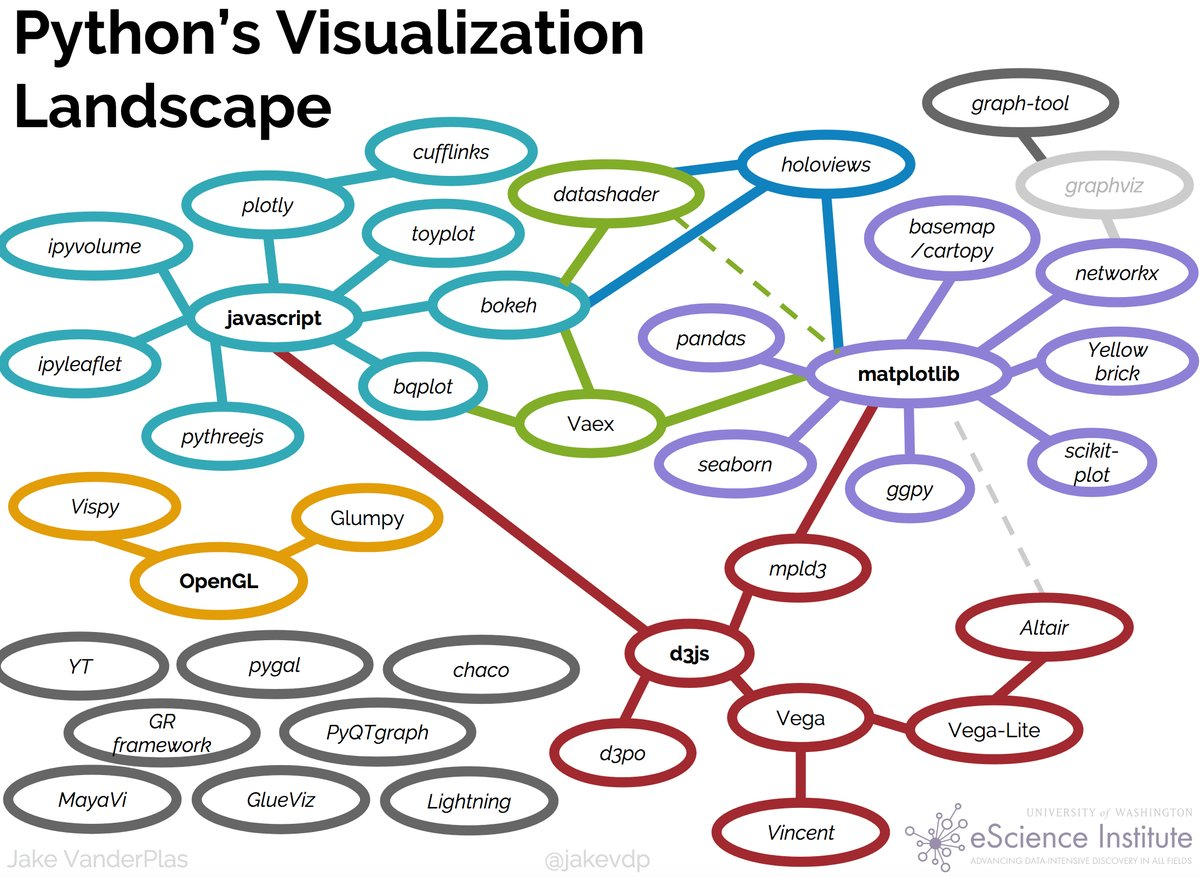
</div>


_Jake VanderPlas' landscape of python plotting libraries._


Getting to the point of mastery with these things tends to elude even the most accomplished scientist or data scientist.  Usually solving these problems involves a fair amount of google searches, looking for solutions online or borrowing code from others.  

As a result you will not feel a complete sense of "mastery" after this section.  However, you can get far enough that you can understand how to make most common plots and also know the right terms to search for when trying to solve more complex problems.

## Introduction to matplotlib

Before we get too deep in the weeds lets look at a few very simple graphs.  Let's begin by making a small list called `fibonacci` that contains a few numbers we'd like python to draw for us.  Then, we'll ask python/matplotlib to plot it.  Here is a simple line plot:

In [ ]:
# make a list of numbers
fibonacci = [1,1,2,3,5,8,13]

# use various matplotlib.pyplot (imported as plt) functions to make
# and format the plot
plt.plot(fibonacci)
plt.ylabel('some fibonacci numbers')
plt.xlabel("index")

plt.show()

The plt.plot() functions assumes the given numbers are the y values and automatically assigned sequentially increasing x values to each point (going from 0 to 6 in this case).

We can also add another line to the plot by using plt.plot() a second time before calling plt.show()

In [ ]:
fibonacci = [1,1,2,3,5,8,13]

# add the fibonacci data to the plot:
plt.plot(fibonacci)

# make a set of linearly increasing numbers
linear = [1,2,3,4,5,6,7]

# add the linear data to the plot
plt.plot(linear)

# add some axis labels
plt.ylabel('some numbers')
plt.xlabel("index")

# show the figure
plt.show()

If we want to change the colors of the plot here we can specify them as an argment to the `plt.plot()` function.  There are a variety way to set colors in matplotlib but one simple one is through a single character reprenting common colors:

| **code** | **color** |
|-------|------------|
| b | blue |
| g | green |
| r | red |
| c | cyan |
| m | magenta | 
| y | yellow |
| k | black |
| w | white |



You can read more about colors in matplotlib [here](https://matplotlib.org/tutorials/colors/colors.html).  Here's an example where we change the color of the two lines we plotted to be cyan and magenta.

In [ ]:
import matplotlib.pyplot as plt
fibonacci = [1,1,2,3,5,8,13]

# include a second argument for color using color code 'c'
plt.plot(fibonacci,'c')

linear = [1,2,3,4,5,6,7]

# include a second argument for color using color code 'm'
plt.plot(linear,'m')

plt.ylabel('some numbers')
plt.xlabel("index")
plt.show()

You can also change the type of line that was drawn by specifying a single character after the color


| **code** | **type** |
|-------|------------|
| - | solid line |
| -- | dashed line |
| -. | dash-dotted line |
| : | dotted line |
| '' | none | 

Here's an example where the fibonacci sequence was turned to a dashed line and the linear sequence to a dotted one.

In [ ]:

fibonacci = [1,1,2,3,5,8,13]

# include a second argument for color and line style 
plt.plot(fibonacci,'c--')


# include a second argument for color and line style 
plt.plot(linear,'m:')

plt.ylabel('some numbers')
plt.xlabel("index")
plt.show()

#### Adding a legend to a matplotlib plot
Anytime we have multiple patterns in the same plot using colors to differentiate them we want to give the reader some type of **legend** which lets them lookup the meaning of the different colors.  

In matplotlib this can be as simple as just calling the `plt.legend()` function after including a label= argument for each plot.

In [ ]:
import matplotlib.pyplot as plt
fibonacci = [1,1,2,3,5,8,13]

# label this line as 'fibonacci' for use in legend
plt.plot(fibonacci,'k--', label='fibonacci')
linear = [1,2,3,4,5,6,7]

# label this line as 'count' for use in legend
plt.plot(linear,'m:', label='count')
plt.ylabel('some numbers')
plt.xlabel("index")

# add a legend, and set the location to 'upper left'
# the legend will use the labels we set in plot.plot()
plt.legend()
plt.show()

This chapter could go on for pages (and in fact could be an entire book) if we stepped through every possible customization available within matplotlib.  Instead, I am providing links here to a couple of the useful tutorials on the matplotlib website.  If you get interested in becoming a plotting master in matplotlib reading through these might be helpful.

- [Intro to pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py): this is a very basic introductory mode of using matplotlib most similar to matlab
- [Colors in matplotlib](https://matplotlib.org/tutorials/colors/colors.html): learn about all the color options
- [A guide to legends](https://matplotlib.org/tutorials/intermediate/legend_guide.html): how to customize legends
- [A gallery of examples with code](https://matplotlib.org/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py): Check here and perhaps you can get some starter code

### Some (sometimes interesting) technical stuff

Here is a bit of technical stuff about matplotlib which is not strictly *necessary* to know in order to make most plots, especially in seaborn, but it can help you understand a bit more about why certain commands exist.  First we want to decompose a figure into various parts:


    
<div style="text-align: center">
    <img src="https://matplotlib.org/_images/anatomy.png" width="650">
</div>

There are lots of graphic elements that you can modify in matplotlib but the most important conceptual ones are the **figure**, the **axes**, and the **axis**.

#### Figure
The overall figure is a special object in matplotlib.  The figure keeps track of all the various elements of the figure.  A figure can have one or more **axes**, **legends**, **titles** and so on as well as the **canvas** which (like a painting) is where things are drawn.  To create a figure:

#### Axes
Axes are what we typically would think of as a "plot".  A multipanel with multiple figues in it would have multiple **axes**.

In [ ]:
fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

ax_lst[0,0].set_title("Panel 1")
ax_lst[0,1].set_title("Panel 2")
ax_lst[1,0].set_title("Panel 3")
ax_lst[1,1].set_title("Panel 4")

If you want to learn more about subplots and more advanced plot layout like the one below check out the matplotlib tutorials on [gridspec](https://matplotlib.org/3.1.0/tutorials/intermediate/gridspec.html#sphx-glr-tutorials-intermediate-gridspec-py) and the [tight layout guide](https://matplotlib.org/3.1.0/tutorials/intermediate/tight_layout_guide.html#sphx-glr-tutorials-intermediate-tight-layout-guide-py).

#### Axis

The Axes contains two or three Axis objects (be aware of the difference between **Axes** and **Axis**) which take care of things like the range of numbers that are displayed in the plot, the markings known as 'ticks' that appear along a axis the help you know the value of numbers, and the labels (the data limits can also be controlled via set via the `set_xlim()` and `set_ylim()` Axes methods).  

In [ ]:
# first use linspace to create the xvalues going from 0 to 5 in 50 steps
# the numpy linspace function takes a start, a stop, and how many steps you want
# and it will return that many evenly spaced numbers.
# This will give us 50 numbers from 0 to 5:
x1 = np.linspace(0.0, 5.0, 50)  

# first use linspace to create the xvalues going from 0 to 2 in 50 steps
x2 = np.linspace(0.0, 2.0, 50) 


In [ ]:
# next use the numpy cosine function (np.cos()), np.exp(), and np.pi to create a dampened function
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1) 

# and un-dampened oscillatory function
y2 = np.cos(2 * np.pi * x2) 

**Note** that we used three numpy functions or methods (linspace(), cos(), and exp()) and one numpy attribute that didn't have parentheses in the form of np.pi

Now make some plots. For formatting the line we will use color and line types as previously but also add a symbol or shape to mark each datapoint using the [matplotlib symbol codes](https://matplotlib.org/stable/api/markers_api.html)

In [ ]:
# Create figure with two subplots
fig, ax = plt.subplots(2)

# plot dataset 1 in color black 'k', marker as circles 'o', and solid line '-': 'ko-'
ax[0].plot(x1, y1, 'c-')
ax[0].set(title='A tale of 2 subplots', ylabel='Damped oscillation')

# plot dataset 1 in color red 'r', marker as dots '.', and solid line '-': 'r.-'
ax[1].plot(x2, y2, 'r.-')
ax[1].set(xlabel='time (s)', ylabel='Undamped')
plt.tight_layout()
plt.show()

So in this example we have a single figure with two Axes, and each of the Axes has two axises in the form of the horizontal (x) axis and the vertical (y) axis.

There are a few other details about matplotlib that are useful to know about such as legends, etc... but for now this should help get you oriented to the main things.

## Exploring common plot types through seaborn

We now have a general sense of how to control some basic aspects of a plot.  However, it feels like a lot of work.  We have to create axes, adjust axis, add tick marks, adjust the colors of plots, etc...  This seems like it would be a lot of hassle (and it is!).  

Luckily there are some pacakges for python that make common types of plots very easy to deal with.  One of the best libraries for this is [seaborn](https://seaborn.pydata.org).  From the seaborn website:

> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.





The seaborn [gallery](https://seaborn.pydata.org/examples/index.html) has nice examples showing off some of the types of figures possible with seaborn.

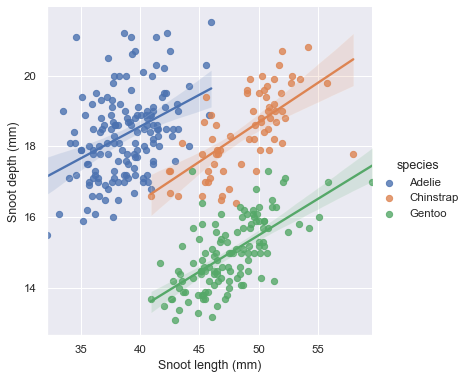
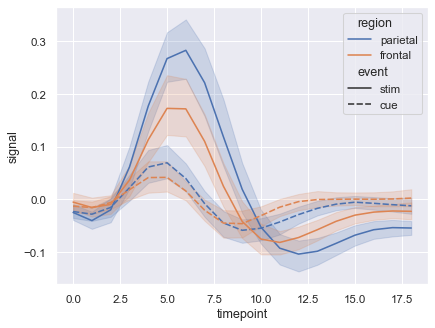

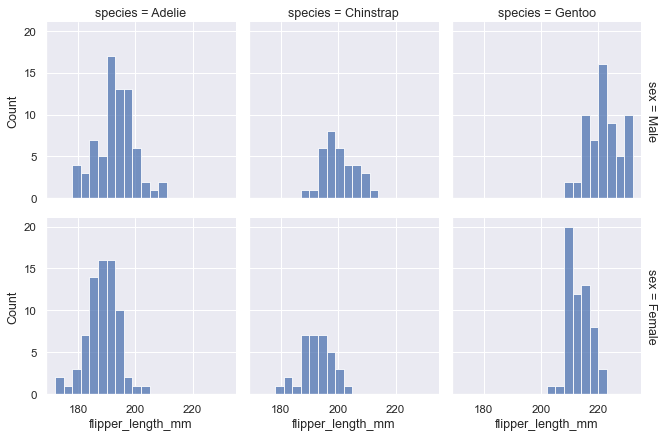

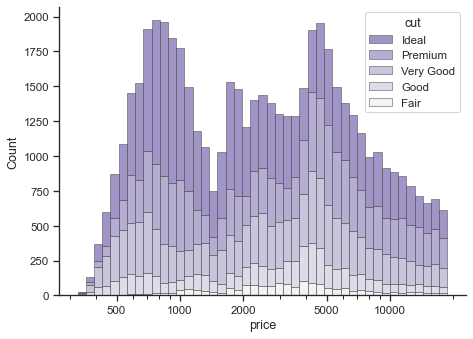
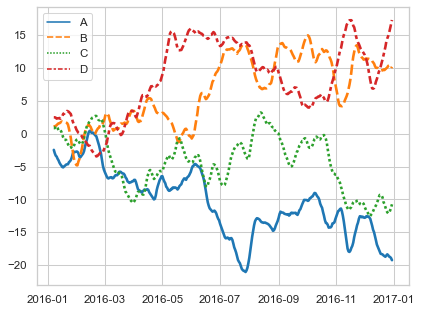


If you click on an example in the seaborn gallery it shows you the code that was used to generate the plot.  In almost all cases even pretty complex plots take less than a 1/2 page of code.

Seaborn itself has an extensive and very helpful [tutorial](https://seaborn.pydata.org/tutorial.html).  


In the next sections are examples of paticular kinds of plots that are good for certain kinds of data.

#### Seaborn and Pandas dataframes

Seaborn is particularly useful in Python when combined with Pandas dataframes.  Seaborn makes it very easy to map columns of a data frame to visual attributes of a plot.

Let's go through several examples of common types of plots that you would use in an analysis, discuss the types of data they are best suited for, each time paying attention to how we specify to seaborn the mapping between columns of our data and visual attributes of a plot.

### Scatterplots

Scatterplots are a simple but effective tool for visualising data. We’ve already seen scatterplots in this section, when using the sns.lmplot() function to draw the Anscombe's quartet data. 

Scatterplots show us the relationship between two variables. This is usually what is meant by the term “scatterplot” and often accompany correlation or regression analyses. 

In this kind of plot, each observation corresponds to one dot: 
- the horizontal location of the dot plots the value of the observation on one variable
- the vertical location displays its value on the other variable. 

In many situations you don’t really have a clear opinions about what the causal relationship is (e.g., does A cause B, or does B cause A, or does some other variable C control both A and B). If that’s the case, it doesn’t really matter which variable you plot on the x-axis and which one you plot on the y-axis. 

If you do have a pretty strong idea which variable you think is most likely to be causal, or at least you have some suspicions in that direction then it’s conventional to plot the cause variable on the x-axis, and the effect variable on the y-axis.

First let's use seaborn to load some example data called 'tips' which looks at how much people tip as a function of a number of variables such as the total bill, if the person was a smoker, the day of the week, etc..  The seaborn `sns.load_dataset()` function loads a pandas dataframe:

In [ ]:
tips = sns.load_dataset("tips")
tips.head()

**Notice that this dataset is "tidy" in the sense that distinct variables appear in their own column and the rows reflect individual measurements.**

We can then make a scatter plot of the total bill versus the tip using `sns.relplot()` (short for relational plot, as in the relationship between our variables):

In [ ]:
sns.relplot(x="total_bill", 
            y="tip", 
            data=tips)

Lets unpack the code. Many seaborn (sns) functions have optional named arguments. For functions like that there are a number of input arguments that have default values, so you can include them if you want, otherwise the function will run with them using the default settings.

The input arguments we used here are pretty straightforward. 

The last argument is critical: `data=tips`.  This tells seaborn we want to plot something from the `tips` dataframe we created earlier.  

For instance when we say `x="total bill"` we are telling Seaborn to map the x-value of each dot in the scatter plot to the `total_bill` column.  We also write `y="tip"` which tells seaborn that the `tip` column should be used for the y-position.  

This example highlights one very important part of seaborn which is that it deeply integrates to pandas dataframes allowing you to quickly do plots like above or to generate groups of plots as we'll do below. 

### Computing correlation (again)

As in the earlier Anscombe's quartet example we have paired numeric data in the form of total_bill and tip for each party.

We can ask if these two numbers are correlated using scipy.stats (imported as stats) pearsonr() function.

Output is a two-element tuple that can be indexed with square brackets. First entry is the r value [-1 to 1] and the second is the p value for the null hypothesis test.

```python
corr_results = stats.pearsonr(x,y)

# r value for correlation:
corr_results[0]

# p value:
corr_results[1]

```

In [ ]:
# compute the correlation between total_bill and tip in the whole dataset


### The seaborn 'hue semantic'

The `relplot()` command can also plot a third variable or relationship by using color.  In seaborn this is called "hue semantic" because the color starts to show a meaning.

First take a look at the dataframe again. It has a column 'smoker' that is binary (two outcomes) with values of 'yes' or 'no'

In [ ]:
tips.head()

Using the "hue semantic" means seaborn is going to convey the information about a third variable using  color (the first two variables tip and total bill are displayed on the x and y axes of the plot).

In [ ]:
sns.relplot(x="total_bill", 
            y="tip", 
            hue="smoker", 
            data=tips)

We are now telling Seaborn to do a scatterplot with the data in the Pandas dataframe we called `tips` mapping 'total_bill' to x, 'tip' to y, and color the dots accoridng to the value in the 'smoker' column.

Notice that a legend was automatically added to the figure.  Colors were also automatically chosen to be clearly distinguishable but also pleasing.

A really nice thing about seaborn is that we can quickly look at a different relationship if we want.  

For example, the 'size' column of the data frame is the number of people in the party (i.e., seated at the same table).  So instead of using 'smoker' as the grouping factor we can use the party size:

In [ ]:
tips.head(2)

In [ ]:
sns.relplot(x="total_bill", 
            y="tip", 
            hue="size", 
            data=tips)

Now the dot color represents the size of the party with the color mappings automatically shown in the legend.

Interestingly seaborn automatically adjusted the colors to be a nice sequential pink-purple scale instead of the dichotomous orange/blue because there were more categories of size and they are not a nominal factor.  

This highlights how useful seaborn is for exploring datasets.  Two lines of code leading to two very different views on the same data.

In the binary case (smoker/non-smoker) Seaborn chose colors that were divergent (orange and blue). 

With `size` as the hue grouping variable Seaborn inferred that these numbers were sequential and so assigned a color pallette where the colors change gradually as the numbers in `size` change.

You can also change the symbol or _style_ of the marker used in the scatter plot by assigning the 'style' of the marker to one of the columns.  

For example, going back to the smoker example we can make the dots differ in color and shape based on the "smoker" column:

In [ ]:
sns.relplot(x="total_bill", 
            y="tip", 
            hue="smoker", 
            style="smoker", 
            data=tips)

You can go overboard and put lots of data relationships in the same plot:

In [ ]:
tips.head()

In [ ]:
sns.relplot(x="total_bill", 
            y="tip", 
            hue="size", 
            style="time", 
            size='day', 
            data=tips)

Now we have color showing party size, style/marker shape showing if it is lunch or dinner, marker size corresponding to day of the week and otherwise the plot relates the total tip to the total bill.

This latter example highlights that a little thought about formatting choices can go along way to facilitating understanding of the data.

For example in this I haphazardly applied formatting based on grouping from the data columns. 

Instead, I should have considered correspondences between the meaning of the data and the formatting like using the size of the dots to represent the size of the party (meaningful) and not the day of the week (implies an _ordering_ of the days of the week that isn't really relevant).

Luckily we can very quickly change our figure:

In [ ]:
sns.relplot(x="total_bill", 
            y="tip", 
            hue="day", 
            style="time", 
            size='size', data=tips);

In [ ]:
tips.head()

Another reason this data is so easy to plot is because it is organized in a pandas dataframe as a **tidy** dataset.  We discussed tidy data formatting in a previous chapter.  This is where that discussion begins to pay off.  Because each piece of data is a column and there are descriptors of each data point in the other columns we can easily use different columns to group or color the data in a myriad of ways.  The main point is that adopting dataframes+tidy data organization can make other stuff you do very simple (as short as one line often!).

Going back to the example of using the size of the party to determine the color of the points.  Imagine instead we want the size of the dot to relect the size of the party:

In [ ]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips)

Now everything is the same color but the bigger dots relect bigger tables which kind of has a nice congruency to it.  

Something to notice in the previous example using the sizes= argument is that throughout these examples we are making use of optional arguments for each kind of seaborn plot.

If we want to get some information, or the documentation, about a particular function we can use the ?? syntax as in the next cell. It will open a new window describing the function, its inputs, and more info.

In [ ]:
??sns.relplot

### Lineplots

Scatterplots are a very, very important tool for getting insight into the relationship between two continuous variables.  

However, in some types of data individual data points are linked to one another.  For example, data that is measured at different points in time might be better visualized as a line.  Let's create some example data:

In [ ]:
df = pd.DataFrame({'time': np.arange(500),
                   'score': np.random.randn(500).cumsum()})


In [ ]:
# make a dataframe from a dictionary {}
# with keys 'time' and 'score' and
# values constructed from random number
# generators:
df = pd.DataFrame({'time': np.arange(500),
                   'score': np.random.randn(500).cumsum()})

# make relplot() but include kind="line" optional inpnut argument:
sns.relplot(x="time", 
            y="score", 
            kind="line", 
            data=df)

Notice this is a very different looking plot however it uses the same `replot()` function we used for the scatterplot.  The main difference is that the `kind='line'` option was set.  If we plot the same data without the `kind` option set we get a scatterplot again:

In [ ]:
sns.relplot(x="time", 
            y="score", 
            data=df)

### Categorical plots

In the previous section we talked about visualizing the relationship between two continuous variables, possibly using color or the size of dots to display additional information about this relationship.  

When we have a categorical or nominal independent variable but a continuous dependent variable (E.g., reaction time as a function of different conditions in an experiment) a different plot might make more sense.  

One nice plot is known as the seaborn catplot() (**categorical**) plot.  Here is an example for the `tips` dataset:

In [ ]:
tips.head()

In [ ]:
# use seaborn catplot to plot y values grouped by a 
# categorical variable
sns.catplot(x="day", 
            y="total_bill", 
            data=tips);

Let's unpack what is going on here.  

First we have our categorical variable (day of the week or the column `day` in our dataset).  

Then within each level of this variable we have plotted the total bill (`total_bill` column of the dataframe).  Notice that dots are randomly jittered a bit so they don't all plot on top of one another.  This gives a nice visual summary of what types of values are outliers (e.g., the 40 dollar bill on Friday) as well as what seems typical (usually bills are about $20.  We can also see that perhaps people spend a little more money on Saturday and Sunday on their total bill.

You can get rid of the jitter like this using one of the optional arguments (`jitter=`):

In [ ]:
sns.catplot(x="day", 
            y="total_bill", 
            jitter=False, 
            data=tips);

This does not illustrate the data as clearly since everything is on top of one another but in some ways its visually cleaner.  

Related to jitter is a thing called a "swarmplot" which prevents the dots explicitly from overlapping visually. The swarmplot can be achieved by using the catplot() optional argument `kind` set to "swarm":

In [ ]:
sns.catplot(x="day", 
            y="total_bill", 
            kind="swarm", 
            data=tips)

For a more summarized view of the data in a catplot use kind='bar' to get a classic bar plot where the height of the bar is the mean of the y data within the x= groupings and ci='sd' says put the standard deviation as error bars.

In [ ]:
sns.catplot(x="day", 
            y="total_bill", 
            kind="bar", 
            ci='sd',
            data=tips)

We can further break down the bar plot using the hue= argument to catplot. Now let's add the time of day to our bar plot so things are broken by day and then Lunch vs Dinner

In [ ]:
# make a bar plot with hue='time'


### Histograms

Histograms are another major type of plot which is important for exploring your datasets.  

They make most sense when you have a univariate (i.e., single type of data) on an interval or ratio scale.  Most of you probably know how histograms work, since they’re so widely used, but for the sake of completeness I’ll describe them. All you do is divide up the possible values into bins, and then count the number of observations that fall within each bin. This count is referred to as the frequency of the bin, and is displayed as the height of a bar.

Histograms help reveal which values are common or typical in your data, what the shape of the overall distribution is (sometimes useful for checking the assumptions of certain statistical tests), and can help detect outliers and other anomolies in your data.  Histograms in seaborn are most often accessed via the figure-level function `sns.displot()`.

This function can take as input any arbitrary python list or array, or a data frame and column:

In [ ]:
# load the penguins dataset provided with seaborn
penguins = sns.load_dataset("penguins")

penguins.head()

Plot a histogram of the values in column "flipper_length_mm":

In [ ]:
sns.displot(x = "flipper_length_mm", data=penguins )


Do othe same plot make input argument kde=True to get the kernel density estimate which is a smoothed continuous estimate of the distribution of the numbers

In [ ]:
sns.displot(data=penguins, 
            x="flipper_length_mm", 
            kde=True)

Check the distribition of total_bill from the tips dataset

In [ ]:
sns.displot(x='total_bill', data=tips)

There are a couple key things about the `displot()` function.  The first is that there is a histogram with certain bins (which we might need to adjust), and there is a smoothed kernel-density estimate (KDE) if we request it.  You can turn the KDE off like this:

In [ ]:
sns.displot(tips['total_bill'], kde=True)

Seaborn chooses reasonable bin widths and numbers of bins for you but you can change these things pretty easily.  For example, you can decrease the number of bins:

In [ ]:
sns.displot(tips['total_bill'], kde=False, bins=3)

or increase them:

In [ ]:
sns.displot(tips['total_bill'], kde=False, bins=100)

In those examples we told seaborn how many bins to use and let it figure out their spacing based on the data (making evenly spaced bins from min to max values of the data. You can also specify them directly:

In [ ]:
sns.displot(tips['total_bill'], kde=False, bins=np.linspace(-100,100,40))

This later example uses `np.linspace()` to create a set of 20 bins ranging from zero 0 to 100.  This goes far past the largest observation we have (around 50) but can be useful in cases where you expected such observation to occur.

If you want to combine more than one histogram into the same plot you can provide the different datasets in a list it will combine the data on the same axes.  Here is an example:

In [ ]:
# numpy random.normal function (np.random.normal) will
# return a set of numbers (with size = to the input argument) 
# corresponding to a normal distribution with mean and standard
# deviation specified by the first and second inputs
x = np.random.normal(0,1,size=100) # zero centered normal distribution
y = np.random.normal(3,1,size=100) # shift this one over
sns.displot([x,y])

One thing to note here is that we didn't use a dataframe to run the code. Instead we had two variables x and y each with a bunch of numbers in them and used that to plot. 

Although seaborn is tightly integrated with Pandas, we can also use it with other kinds of Python data types (like numpy arrays in the previous example). Note in particular that the input data was a _list_ of the variables.

We can do the same thing making multiple histograms on the same figure using Pandas by giving a list of columns we're interested in:

In [ ]:
sns.displot([tips['total_bill'], tips['tip']])

## T-tests: comparing two groups (or one group to a fixed value)

T-tests are commonly used to compare whether two sets of numbers were likely to have come from the same distribution.

- one-sample t-tests where we ask whether a set of numbers was likely to come from a distribution with mean= to some number we specify.
- paired t-tests where we have two sets of matched measurements like a before and after score for each of a group of people and we want to know if the before and after scores are the same
- two-sample t-tests where we compare two sets of numbers that are not paired, like asking whether tips are different on thursdays compared to fridays

Scipy.stats provides a number of t-test functions. Let's start using them.

### One-sample t-test in scipy

```python
scipy_results = stats.ttest_1samp(x, comparison_value)
```

x is a set of numbers

comparison_value the hypothesized mean that you are assessing as likely to have generated the data in x

The result is a tuple with first entry being the t value and the second the pvalue


#### One-sample test: are the tips in the overall dataset different from zero?

### Independent sample t-test in scipy

The independent sample t-test is used when we have two sets of numbers and we want to compare them but they are not matched (that is, there isn't a matched group1 and group2 score for each entity).

This would be the case for example if we wanted to compare assessment scores between two different schools. In the tips data we might use it to compare the total_bill on two different days.

It's used like this:

```python
scip_results = stats.ttest_ind(group1, group2)

# returns t stat and p value:
scip_results
````


In [ ]:
# peak at the tips dataset
tips.head()

We'll compare the toal bill for Dinner vs Lunch (the 'time' column in the tips data)

In [ ]:
# make a bar plot to see the data for two times of day


In [ ]:
# pull data for each time into their own dataframes for easier use in scipy t-test
dinner_data =
lunch_data = 

In [ ]:
# use scipy to do two sample t-test


#### Welch's t-test in scipy

The basic indpendent sample t-test assumes equal variance in the two groups. If they are not (which is often true) the correct test to use is Welch's t-test. 

Running Welchs independent sample ttest in scipy simply involves passing an optional `equal_var` argument to the function. By default it is set to True and runs Student's t-test. Set it to false to run Welch's test:


### paired t-test

For completeness we'll introduce the paired t-test here as well. We will come back to these stats functions in more detail in coming weeks.

The paired t-test is when the measurements in your two sets are lined up: like before and after scores within person.

The syntax in scipy should be familiar now:

```python
stats.ttest_rel(x, y)
```


ttest_rel() for related, and the inputs are the two sets of matched numbers.

In [ ]:
# make a dataset with some paired measurements like scores on test1 and test2 for 100 people

# 100 random numbers from mean 0 distribiution
scores_test1 = np.random.normal(0,1,size=100)

# 100 random numbers from mean 1 distribiution
scores_test2 = np.random.normal(1,1,size=100)


In [ ]:
# use displot to see histograms of the data
sns.displot([scores_test1, scores_test2])

In [ ]:
# run the paired t-test using stats.ttest_rel(x, y)


## Creating Figures for Presentations and Publications versus Exploratory Data Analysis

When we are using a tool like seaborn to perform exploratory data analysis we tend to let the default options of seaborn go and not worry too much about the details of our figures.  The key is here being quick and having very short, readable code for analyzing and exploring.

However, when we come to a final conclusion about a dataset, perhaps backed up by statistics, we often have to choose from one of several plots to include in a paper or presentation about our data.  These are often the most important or interesting results that we want to tell others about.  In this case, it is helpful to do several extra steps to prepare for publication-quality images.  

For example, the default font size in seaborn is quite small.  When you are working in a Jupyter notebook this is not problem.  However, if you present a seaborn plot directly on a projector in a slide presentation it can be hard to read the axis labels.  In addition, by default seaborn uses the names of columns of a data frame as axis labels:

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips)

Since we are familiar with the `tips` dataframe we know what `total_bill` is and the assumed units (dollars? cents?).  However in a presentation we can't count on a audience member knowing these things or keeping track of them in their mind.  As a result we usually want to make a figure more clear, using thicker lines and larger fonts.

Seaborn can help with this with a method called `set_context()`.  There are several pre-set contexts including `paper`, `notebook`, `talk`, and `poster`.  `notebook` theme is the default we have been using, so we don't need to explore that one.  Let's examine how each of these other contexts alters the plot above.

### The `paper` theme

The paper theme makes the axis and legend features even smaller which might be ok when printed out on a higher resolution pdf.

In [ ]:
sns.set_context("paper")
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

### The `talk` theme

The talk theme makes the dots and lines thicker and increases the font size for being projected on a wall or large lower resolution screen.

In [ ]:
sns.set_context("talk")
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

### The `poster` theme

The poster theme makes the dots and lines even thicker than the talk theme!

In [ ]:
sns.set_context("poster")
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

In addition to changing the visibility of these elements for higher and lower resolution output devices it also makes sense in a communicative setting to make the axis labels human-readable.  We often do that using matplotlib functions to change the axis labels:

In [ ]:
sns.set_context("talk")
# if we assign a seaborn plot command to a variable we can 
# use that variable later to control aspects of the plot
# store a 'handle' to the plot in variable g
g=sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

# use the plot handle and the set_axis_labels() method to change
# the x and y axis labels
g.set_axis_labels("Total bill (dollars)", "Tip (dollars)")

Again, you might not take the time to make these changes while doing exploratory analysis in the Jupyter notebook but when you decide a graph is important enough to communicate to someone else, you often want to make some changes to it.

## Further Reading and Resources

- A create and comprehensive [seaborn tutorial](https://seaborn.pydata.org/tutorial.html)
- [Data visualization: A practical introduction](https://socviz.co)
- Another approach to [creating animated graphs in python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)

### Summary

This notebook begins introducing matplotlib, seaborn, and scipy.stats.

Over the next couple of weeks we will continue to work with these tools, learning about additional plot types and ways to customize figures as well as a deeper dive on t-test and correlation alongside tools for ANOVA and regression analyses.